# MODIS Chla surface from 2002 - 2019 
## monthly data 
 |dataset   | month   |
 |----------|-----------|
 |A20030012019031.L3m_MC_CHL_chlor_a_4km.nc | January   |
 |A20030322019059.L3m_MC_CHL_chlor_a_4km.nc | February  |
 |A20030602019090.L3m_MC_CHL_chlor_a_4km.nc | March  |
 |A20030912019120.L3m_MC_CHL_chlor_a_4km.nc | April  |
 |A20031212019151.L3m_MC_CHL_chlor_a_4km.nc| May  |
 | | June  |
 |A20021822019212.L3m_MC_CHL_chlor_a_4km.nc | July  |
 |A20022132019243.L3m_MC_CHL_chlor_a_4km.nc | August  |
 |A20022442018273.L3m_MC_CHL_chlor_a_4km.nc | September  |
 |A20022742018304.L3m_MC_CHL_chlor_a_4km.nc | October  |
 |A20023052018334.L3m_MC_CHL_chlor_a_4km.nc | November  |
 |A20023352018365.L3m_MC_CHL_chlor_a_4km.nc | December  |
 
 
The links to the data:  
* https://oceancolor.gsfc.nasa.gov/l3/order/

In [16]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point
import operator

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio
import pandas as pd
import matplotlib.cm as cm
import glob
import matplotlib.colors as colors

In [17]:
#TempNCDFfiles = glob.glob('modis/*.nc', recursive=True)
#MODIS = xr.open_mfdataset(TempNCDFfiles, decode_times=False, concat_dim = 0, combine='nested')

In [18]:
ds7 = xr.open_dataset('modis/A20021822019212.L3m_MC_CHL_chlor_a_4km.nc')
ds8 = xr.open_dataset('modis/A20022132019243.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds9 = xr.open_dataset('modis/A20022442018273.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds10 = xr.open_dataset('modis/A20022742018304.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds11 = xr.open_dataset('modis/A20023052018334.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds12 = xr.open_dataset('modis/A20023352018365.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds1 = xr.open_dataset('modis/A20030012019031.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds2 = xr.open_dataset('modis/A20030322019059.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds3 = xr.open_dataset('modis/A20030602019090.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds4 = xr.open_dataset('modis/A20030912019120.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds5 = xr.open_dataset('modis/A20031212019151.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)
ds6 = xr.open_dataset('modis/A20031522019181.L3m_MC_CHL_chlor_a_4km.nc', decode_times=False)

In [19]:
Chla_clim = np.stack([ds1.chlor_a,ds2.chlor_a,ds3.chlor_a,ds4.chlor_a,
                            ds5.chlor_a,ds6.chlor_a,ds7.chlor_a,ds8.chlor_a,
                            ds9.chlor_a,ds10.chlor_a,ds11.chlor_a,ds12.chlor_a])

In [5]:
chla_min = np.nanmin(Chla_clim[:,:,:], axis=0)
chla_max = np.nanmax(Chla_clim[:,:,:], axis=0)
chla_dynrng = chla_max-chla_min

Text(0.5, 1.0, '$mg/m^3$')

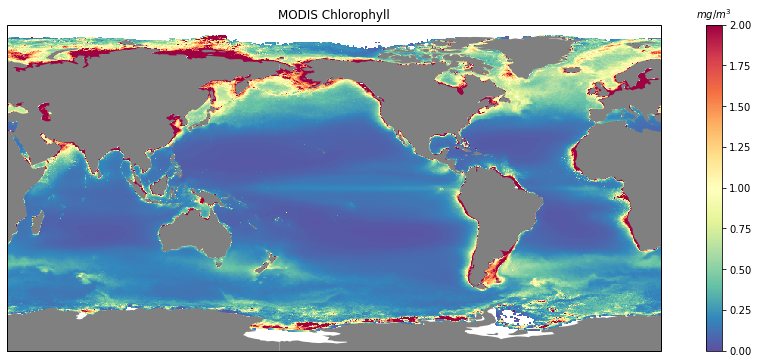

In [14]:
# averaging all of the months 
fig = plt.figure(figsize=(16, 6))
levels = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,10,15,20]
norm = colors.DivergingNorm(vmin=levels[0], vmax=levels[-1], vcenter=5.)
# minimum 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
cf = ax.pcolor(ds1.lon[::10], ds1.lat[::10], np.nanmean(Chla_clim[:,::10,::10], axis =0),
                 cmap='Spectral_r',transform=ccrs.PlateCarree(), vmin=0, vmax=2)
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('MODIS Chlorophyll')
cbar = fig.colorbar(cf)
cbar.ax.set_title('$mg/m^3$', fontsize = 10)

In [ ]:
fig.savefig('chla_annual_modis_sax.png', dpi=600, bbox_inches='tight')

# Now comparing just with the Arcitc Ocean 

In [25]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')
chla_model = np.nansum(np.stack([ds.ppChl, ds.mp1Chl, ds.diazChl, ds.diat1Chl, ds.mp2Chl, ds.diat2Chl, ds.mp3Chl, ds.diat3Chl, ds.mp4Chl]), axis =0)
chla_model[chla_model<0]=np.nan

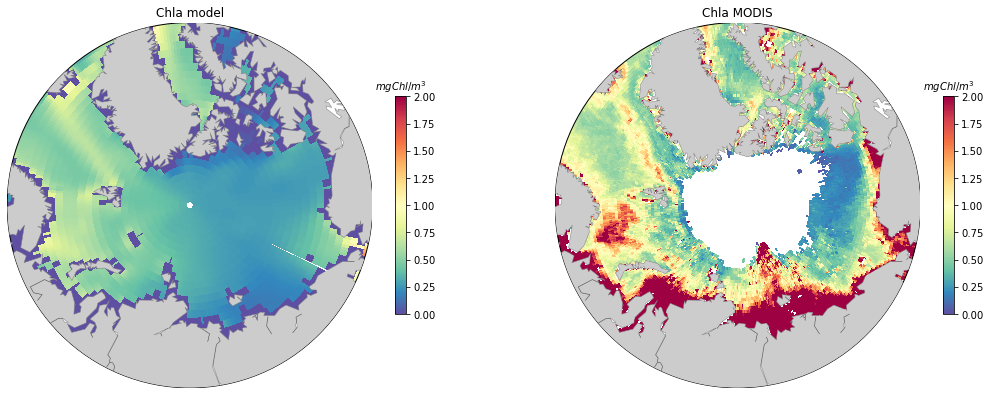

In [26]:
fig = plt.figure(figsize=(18,8))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Model
ax = fig.add_subplot(121) 
ax.set_title("Chla model")
cf = m.pcolor(x,y,np.nanmean(chla_model[:,0,:,:], axis =0),cmap='Spectral_r', vmin = 0, vmax = 2)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$mg Chl/m^3$', fontsize = 10)

m1 = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x1, y1 = m1(*np.meshgrid(ds1.lon[::10], ds1.lat[::10]))
# Observations 
ax1 = fig.add_subplot(122) 
ax1.set_title("Chla MODIS")
cf = m.pcolor(x1,y1, np.nanmean(Chla_clim[:,::10,::10], axis =0),cmap='Spectral_r', vmin = 0, vmax = 2)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$mg Chl/m^3$', fontsize = 10)

m.plot
plt.show()

fig.savefig('Chl_ao.png')

# WOA nitrate, from 1958

In [28]:
ds1_n = xr.open_dataset('data/woa18_all_n01_01.nc',decode_times=False)
ds2_n = xr.open_dataset('data/woa18_all_n02_01.nc',decode_times=False)
ds3_n = xr.open_dataset('data/woa18_all_n03_01.nc',decode_times=False)
ds4_n = xr.open_dataset('data/woa18_all_n04_01.nc',decode_times=False)
ds5_n = xr.open_dataset('data/woa18_all_n05_01.nc',decode_times=False)
ds6_n = xr.open_dataset('data/woa18_all_n06_01.nc',decode_times=False)
ds7_n = xr.open_dataset('data/woa18_all_n07_01.nc',decode_times=False)
ds8_n = xr.open_dataset('data/woa18_all_n08_01.nc',decode_times=False)
ds9_n = xr.open_dataset('data/woa18_all_n09_01.nc',decode_times=False)
ds10_n = xr.open_dataset('data/woa18_all_n10_01.nc',decode_times=False)
ds11_n = xr.open_dataset('data/woa18_all_n11_01.nc',decode_times=False)
ds12_n = xr.open_dataset('data/woa18_all_n12_01.nc',decode_times=False)

In [29]:
no3_clim = np.concatenate([ds1_n.n_an,ds2_n.n_an,ds3_n.n_an,ds4_n.n_an,
                            ds5_n.n_an,ds6_n.n_an,ds7_n.n_an,ds8_n.n_an,
                            ds9_n.n_an,ds10_n.n_an,ds11_n.n_an,ds12_n.n_an], axis = 0)

In [30]:
no3_min = np.nanmin(no3_clim[:,0,:,:], axis=0)
no3_max = np.nanmax(no3_clim[:,0,:,:], axis=0)
no3_dynrng = no3_max-no3_min

Text(0.5, 1.0, '$\\mu mol/kg$')

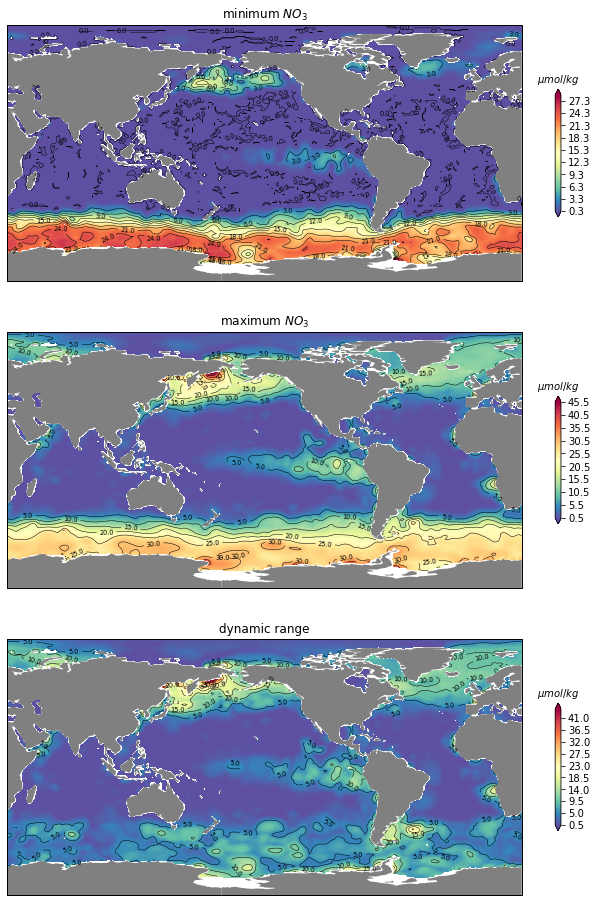

In [9]:
fig = plt.figure(figsize=(12, 16))
lat = ds1.lat

# minimum 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_min, coord=ds1.lon, axis=1)
cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, extend='both')

cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('minimum $NO_3$')
cbar = plt.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)

# maximum 
ax = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_max, coord=ds1.lon, axis=1)
cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, extend='both')

cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('maximum $NO_3$')
cbar = plt.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)

# dynamic range 
ax = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_dynrng, coord=ds1.lon, axis=1)
cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, extend='both')
cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('dynamic range')
cbar = plt.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)

# WOA phosphate, from 1958

In [10]:
ds1_p = xr.open_dataset('data/woa18_all_p01_01.nc',decode_times=False)
ds2_p = xr.open_dataset('data/woa18_all_p02_01.nc',decode_times=False)
ds3_p = xr.open_dataset('data/woa18_all_p03_01.nc',decode_times=False)
ds4_p = xr.open_dataset('data/woa18_all_p04_01.nc',decode_times=False)
ds5_p = xr.open_dataset('data/woa18_all_p05_01.nc',decode_times=False)
ds6_p = xr.open_dataset('data/woa18_all_p06_01.nc',decode_times=False)
ds7_p = xr.open_dataset('data/woa18_all_p07_01.nc',decode_times=False)
ds8_p = xr.open_dataset('data/woa18_all_p08_01.nc',decode_times=False)
ds9_p = xr.open_dataset('data/woa18_all_p09_01.nc',decode_times=False)
ds10_p = xr.open_dataset('data/woa18_all_p10_01.nc',decode_times=False)
ds11_p = xr.open_dataset('data/woa18_all_p11_01.nc',decode_times=False)
ds12_p = xr.open_dataset('data/woa18_all_p12_01.nc',decode_times=False)

In [11]:
po4_clim = np.concatenate([ds1_p.p_an,ds2_p.p_an,ds3_p.p_an,ds4_p.p_an,
                            ds5_p.p_an,ds6_p.p_an,ds7_p.p_an,ds8_p.p_an,
                            ds9_p.p_an,ds10_p.p_an,ds11_p.p_an,ds12_p.p_an], axis = 0)

In [12]:
po4_min = np.nanmin(po4_clim[:,0,:,:], axis=0)
po4_max = np.nanmax(po4_clim[:,0,:,:], axis=0)
po4_dynrng = po4_max-po4_min

Text(0.5, 1.0, '$\\mu mol/kg$')

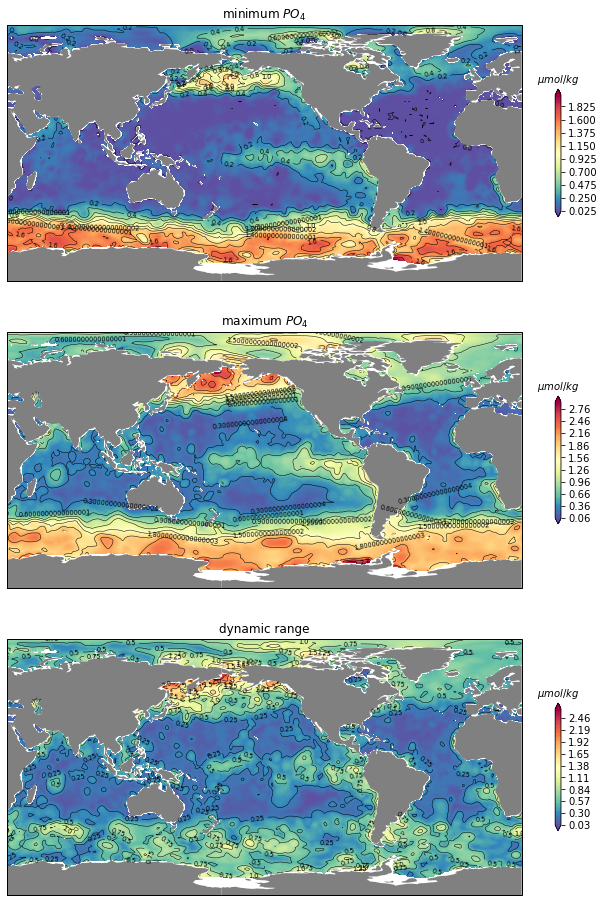

In [13]:
fig = plt.figure(figsize=(12, 16))
lat = ds1.lat

# minimum 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_min, coord=ds1.lon, axis=1)
cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, extend='both')

cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('minimum $PO_4$')
cbar = plt.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)

# maximum 
ax = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_max, coord=ds1.lon, axis=1)
cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, extend='both')

cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('maximum $PO_4$')
cbar = plt.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)

# dynamic range 
ax = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_dynrng, coord=ds1.lon, axis=1)
cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, extend='both')
cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('dynamic range')
cbar = plt.colorbar(cf, shrink=0.5)
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)

In [14]:
sio.savemat('WOA_obs.mat',{'po4_clim':po4_clim,
                          'no3_clim':no3_clim,
                          'temp_clim':temp_clim,
                          'po4_min':po4_min,
                          'po4_max':po4_max,
                          'po4_dynrng':po4_dynrng,
                          'no3_min':no3_min,
                          'no3_max':no3_max,
                          'no3_dynrng':no3_dynrng,
                          'temp_min':temp_min,
                          'temp_max':temp_max,
                          'temp_dynrng':temp_dynrng,
                          'lon':ds1.lon,
                          'lat':ds1.lat})